Enable auto-reloading of external modules

In [1]:
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sys import getsizeof

from utils.data_loader import *
from utils.null_handler import *
from utils.EDA_utils import *

import warnings
warnings.filterwarnings('ignore')

SEED=10
set_default_plot_properties()

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment
    # clear_output()

### Loading ACSEmployment data

In [4]:
config = {
    'state': ["CA"],
    'year': '2016',
    'task': ACSEmployment
}

In [5]:
X_data_load, y_data = ACSDataLoader(task=config['task'], state=config['state'], year=config['year'])

In [6]:
# If the task is ACSEmployment, we can optimize the file size
print(f'Original: {int(getsizeof(X_data_load) / 1024**2)} mb')
print(f'Optimized: {int(getsizeof(optimize_ACSEmployment(X_data_load)) / 1024**2)} mb')

X_data = optimize_ACSEmployment(X_data_load)

Original: 45 mb
Optimized: 23 mb


#### Checking if there are nulls in the dataset

In [7]:
X_data.isnull().sum()

AGEP             0
SCHL         11466
MAR              0
RELP             0
DIS              0
ESP         300716
CIT              0
MIG           3702
MIL          74731
ANC              0
NATIVITY         0
DEAR             0
DEYE             0
DREM         19605
SEX              0
RAC1P            0
dtype: int64

### Preprocessing: Handling nulls

In [8]:
missing = ['SCHL', 'ESP', 'MIG', 'MIL', 'DREM']

In [9]:
handle_nulls = {
    'special': ['SCHL','MIG', 'MIL', 'DREM', 'ESP'],
}

In [10]:
# Checking dataset shape before handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

In [11]:
for how_to in handle_nulls.keys():
    X_data = handle_df_nulls(X_data, how_to, handle_nulls[how_to])

In [12]:
#Checking dataset shape after handling nulls
X_data.shape, X_data.columns

((376035, 16),
 Index(['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC',
        'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P'],
       dtype='object'))

#### Rechecking if there are nulls -- if the null_handler has run correctly, there should not be

In [13]:
X_data.isnull().sum()

AGEP        0
SCHL        0
MAR         0
RELP        0
DIS         0
ESP         0
CIT         0
MIG         0
MIL         0
ANC         0
NATIVITY    0
DEAR        0
DEYE        0
DREM        0
SEX         0
RAC1P       0
dtype: int64

### Analysis for Different Null Scenarios

#### "Optional" Type of Nulls [MIR column]

**Scenario:** MAR, when MAR is in (2,3,4)

In [14]:
special_values = [2, 3, 4]
condition_col='MAR'
target_col='MAR'
fraction=0.9
corrupted_data_MAR = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MAR column: 47040
Count of all records in MAR column: 376035
Count of records in MAR column in the defined condition: 52267




<Figure size 432x288 with 0 Axes>

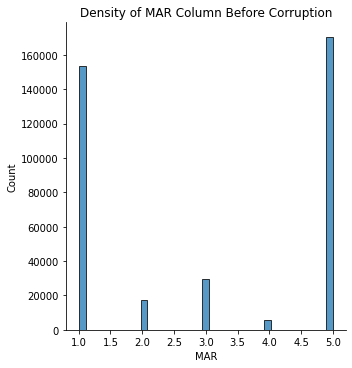

<Figure size 432x288 with 0 Axes>

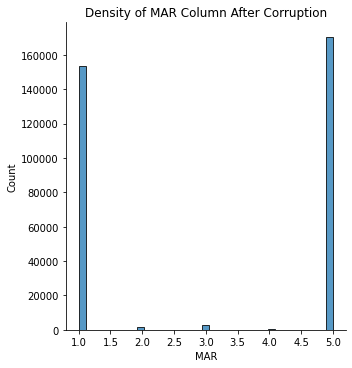

Plot AGEP column Split by Race [Before Corruption]


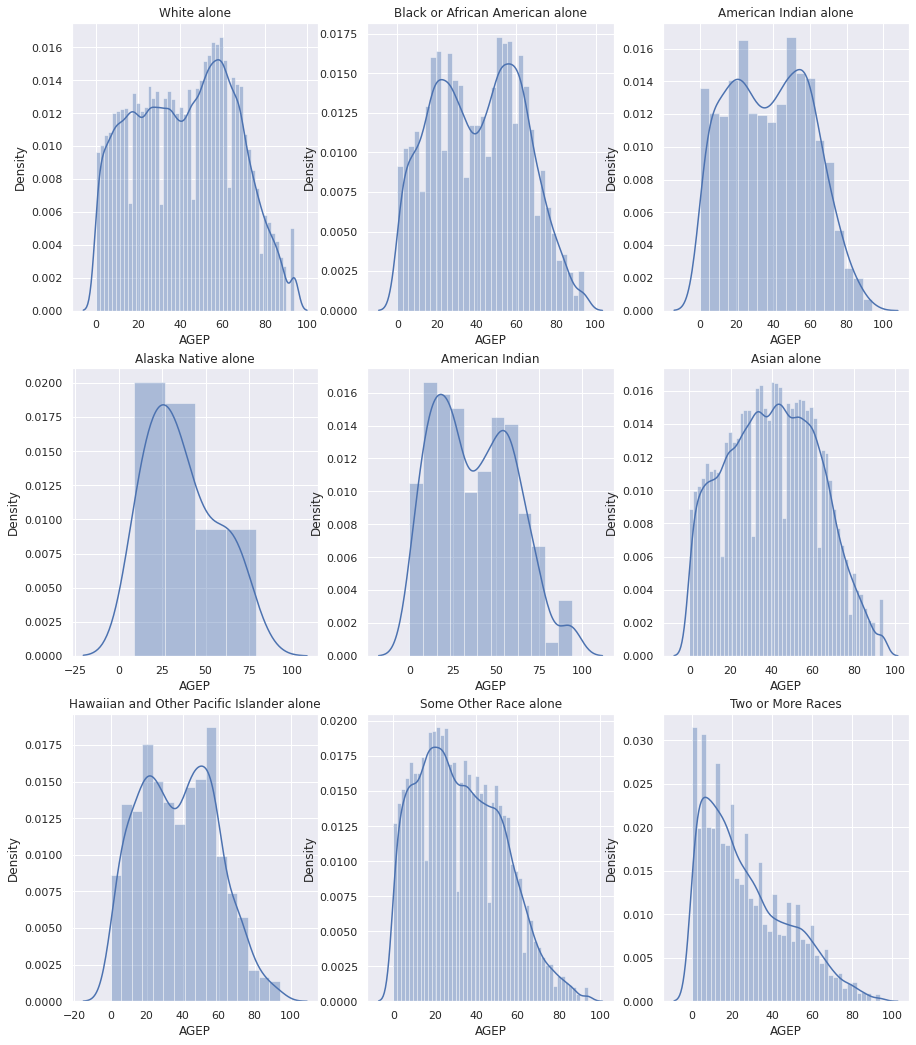




Plot AGEP column Split by Race [After Corruption]


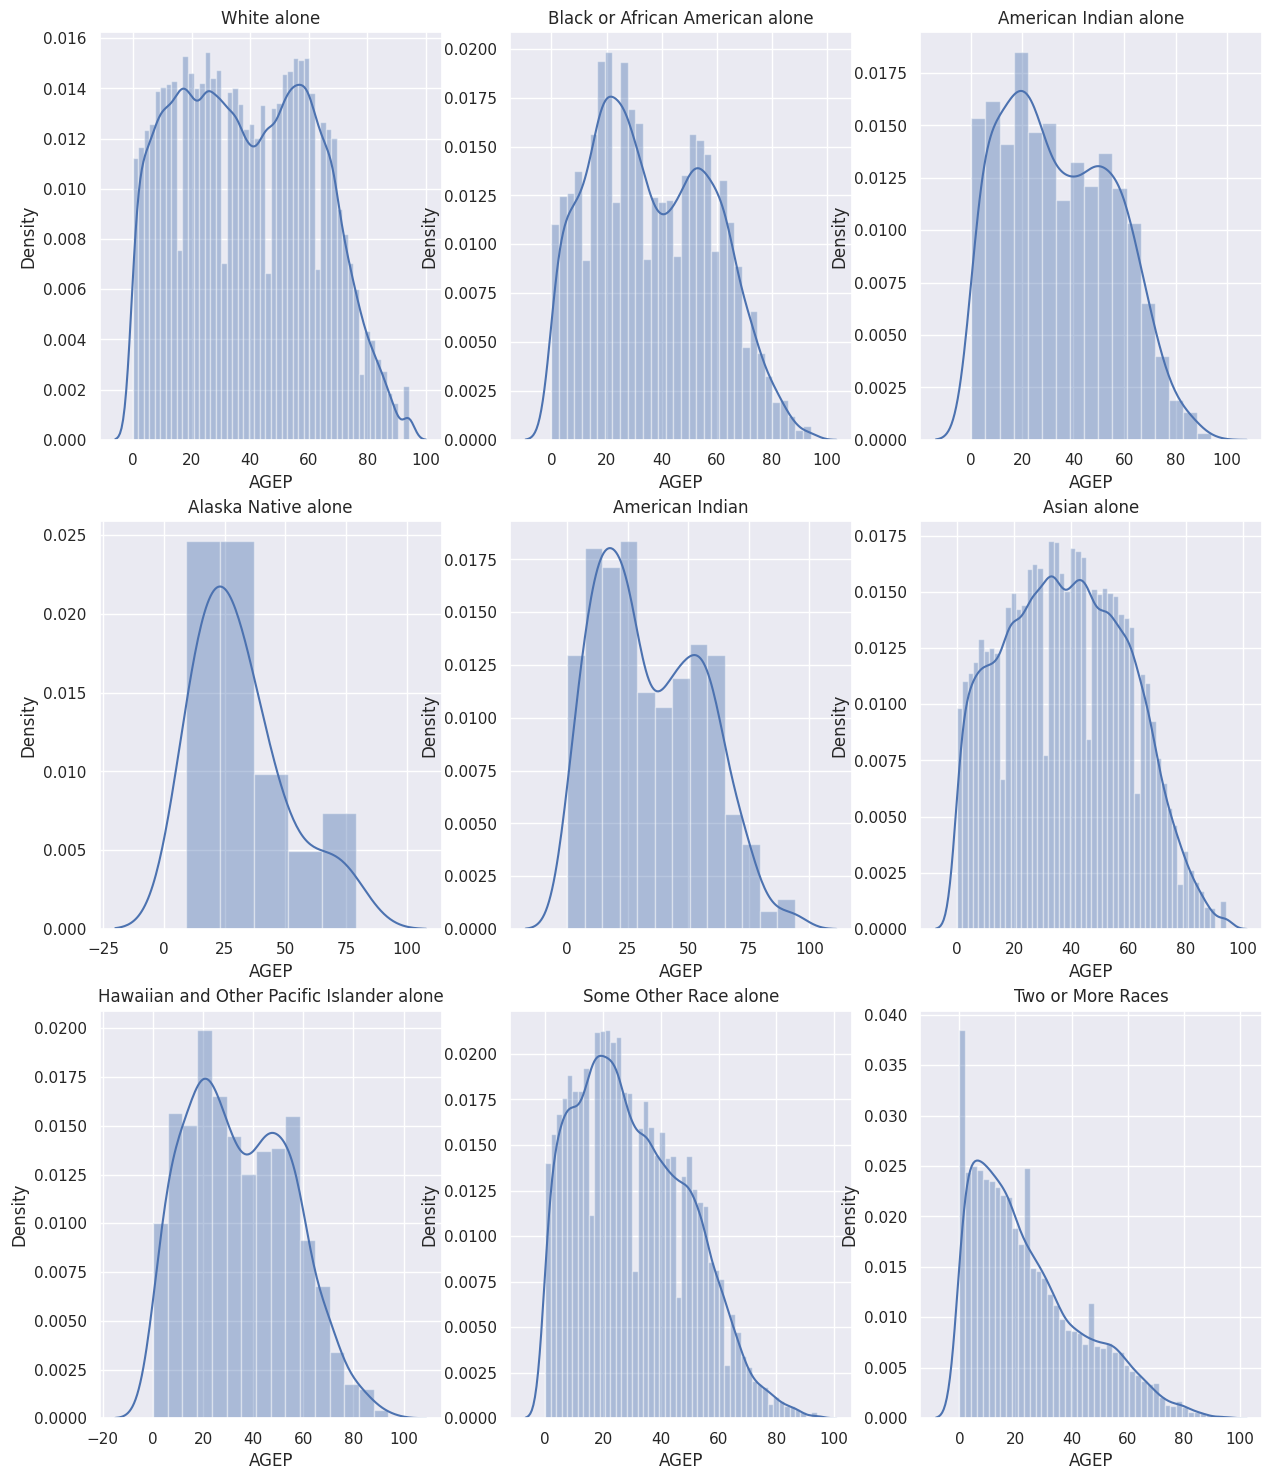

In [15]:
null_scenario_analysis(X_data, corrupted_data_MAR, target_col, condition_col, special_values)

### "Not Applicable" Type of Nulls

#### MIL Column

In [16]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='MIL'
fraction=0.9
corrupted_data_MIL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIL column: 67257
Count of all records in MIL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 1500x500 with 0 Axes>

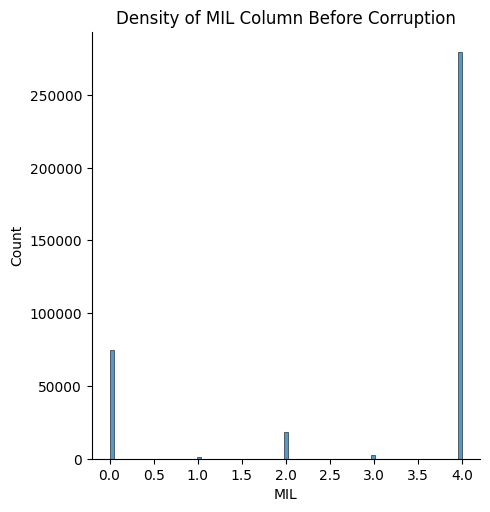

<Figure size 1500x500 with 0 Axes>

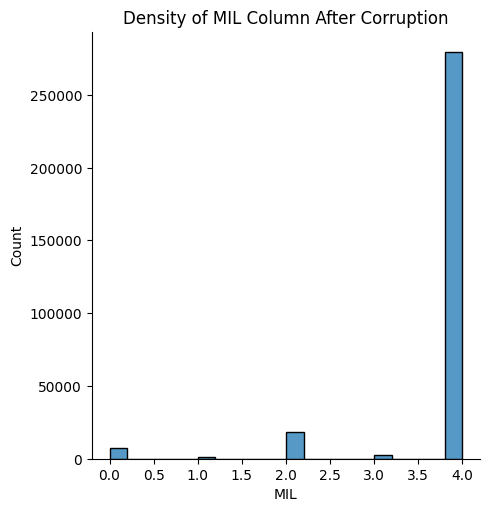

Plot AGEP column Split by Race [Before Corruption]


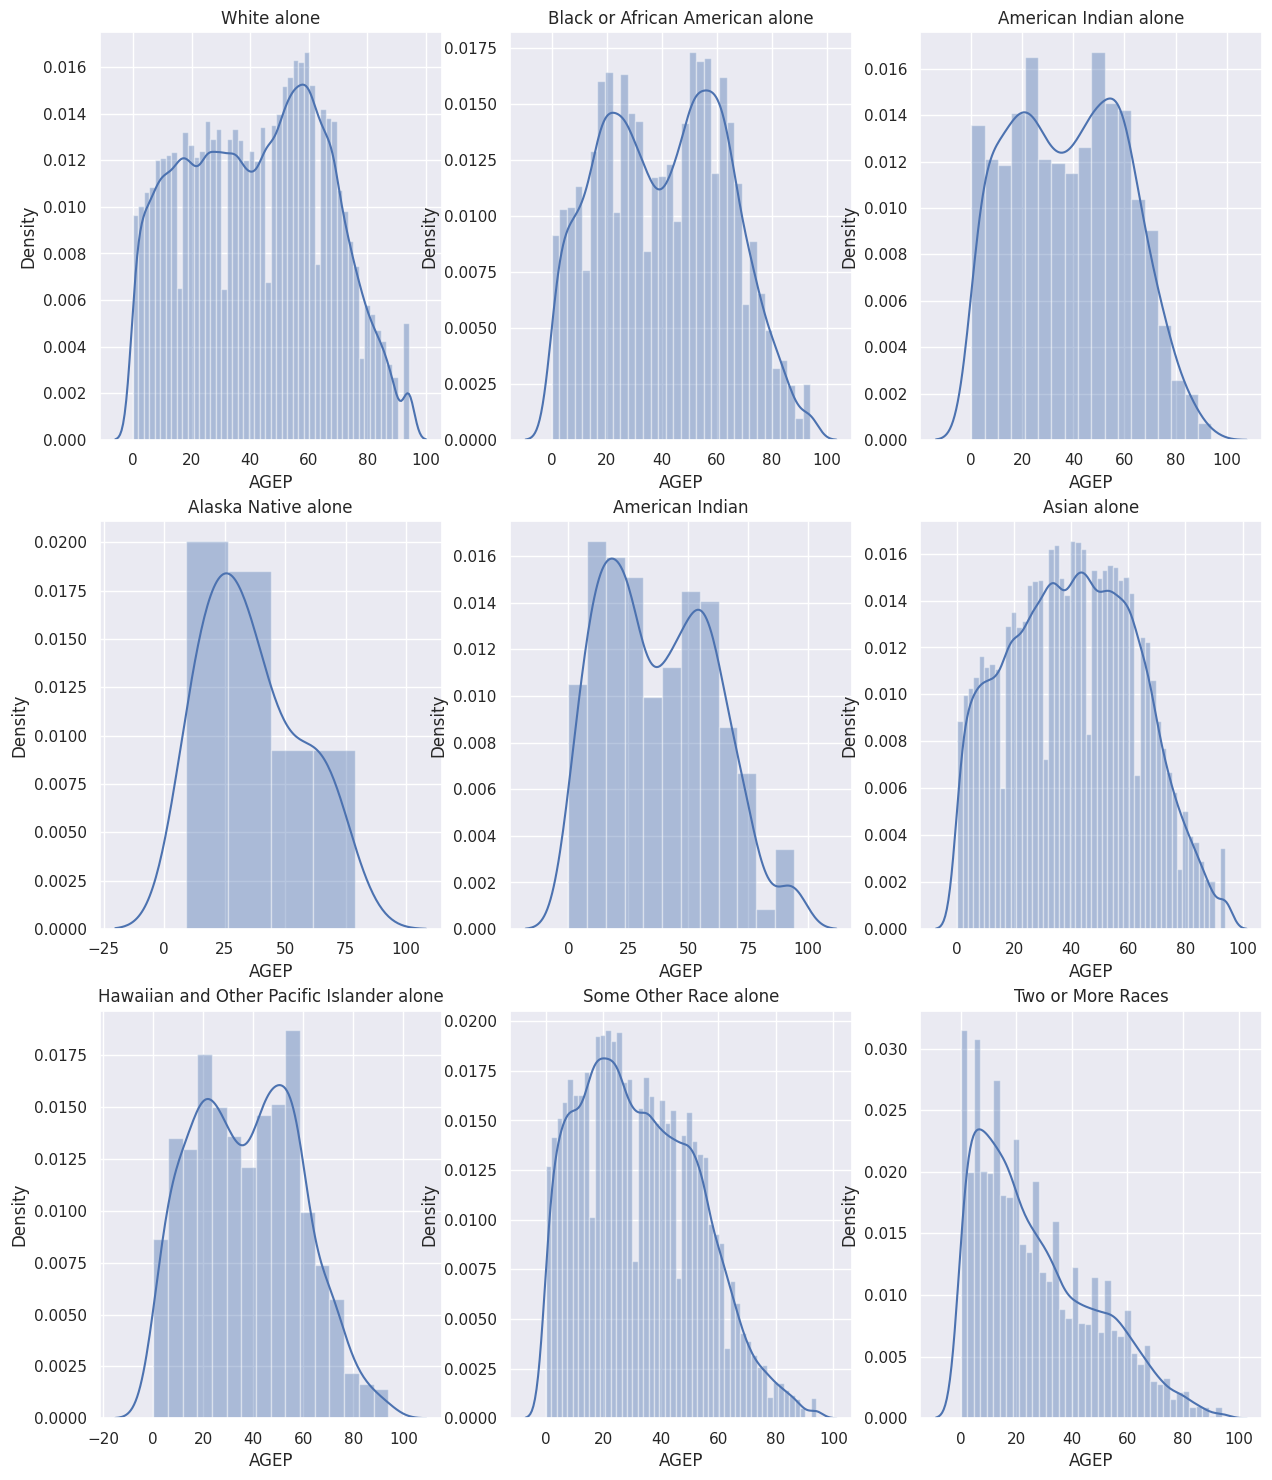




Plot AGEP column Split by Race [After Corruption]


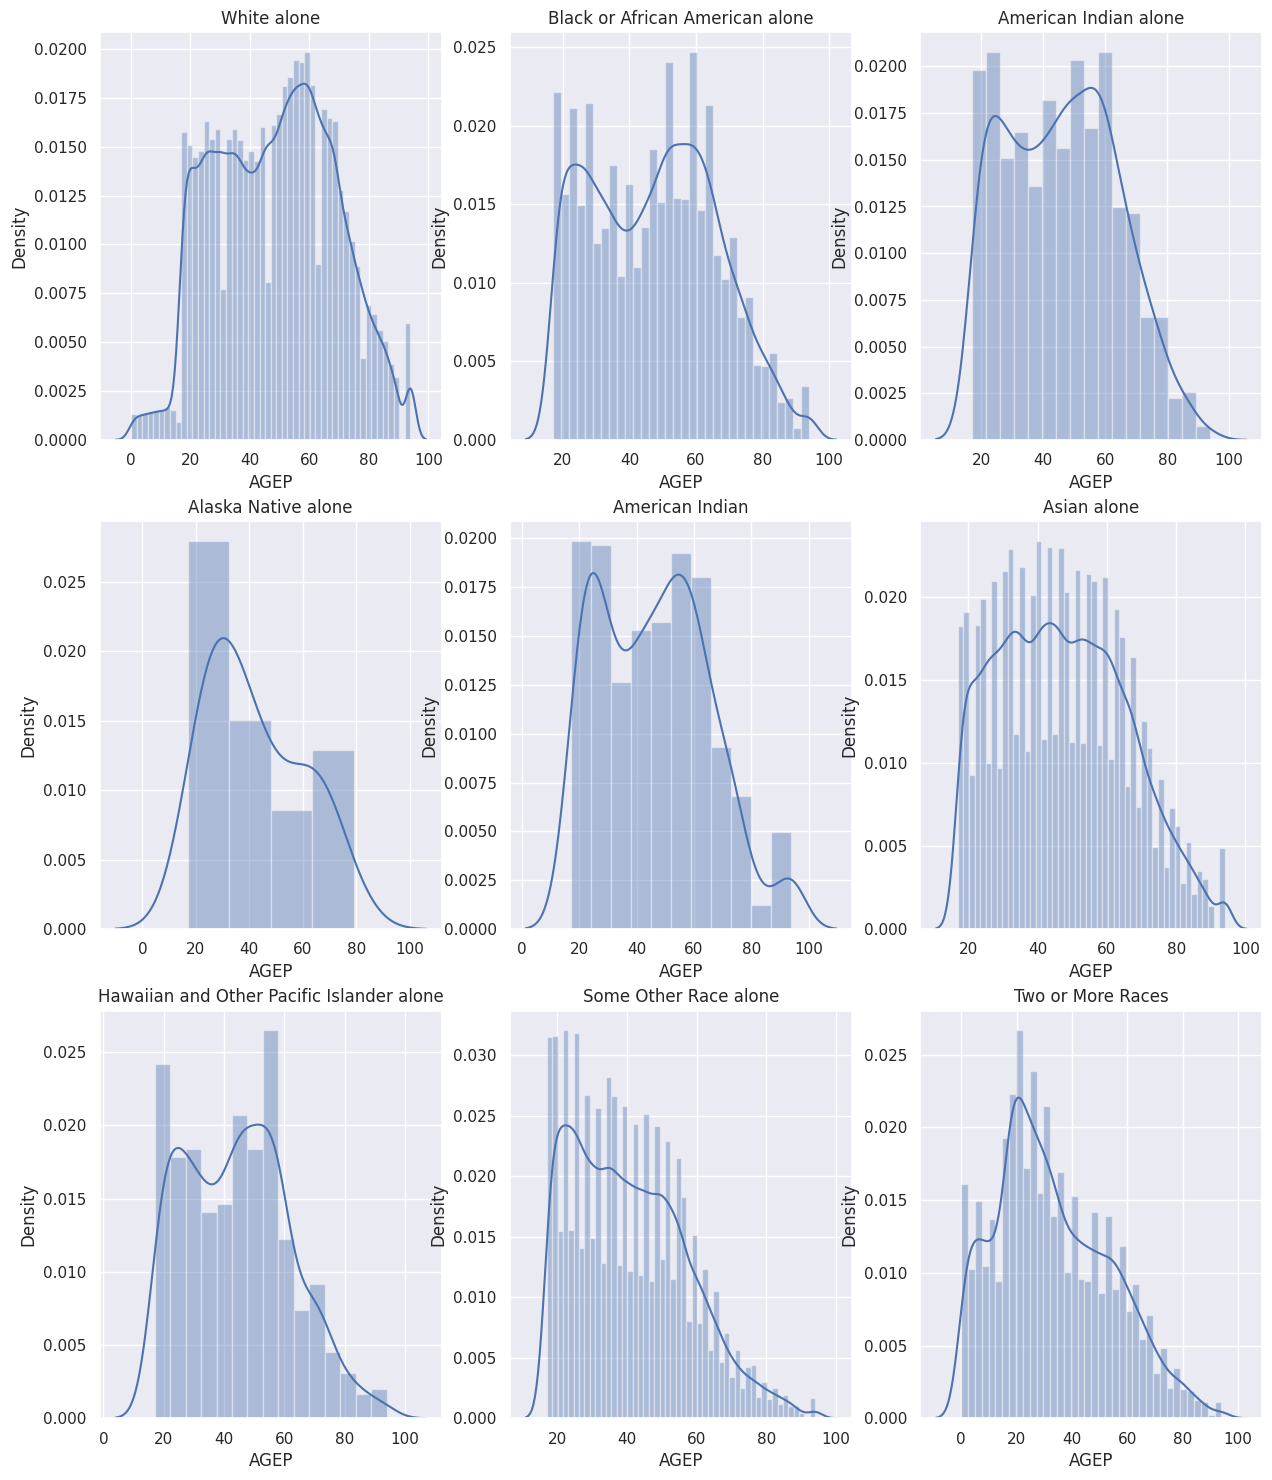

In [17]:
null_scenario_analysis(X_data, corrupted_data_MIL, target_col, condition_col, special_values)

#### SCHL Column

**Scenario:** SCHL is null, when AGEP less than 3 years old

In [18]:
special_values = [i for i in range(0, 17)]
condition_col='AGEP'
target_col='SCHL'
fraction=0.9
corrupted_data_MIL = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for SCHL column: 67257
Count of all records in SCHL column: 376035
Count of records in AGEP column in the defined condition: 74731




<Figure size 1500x500 with 0 Axes>

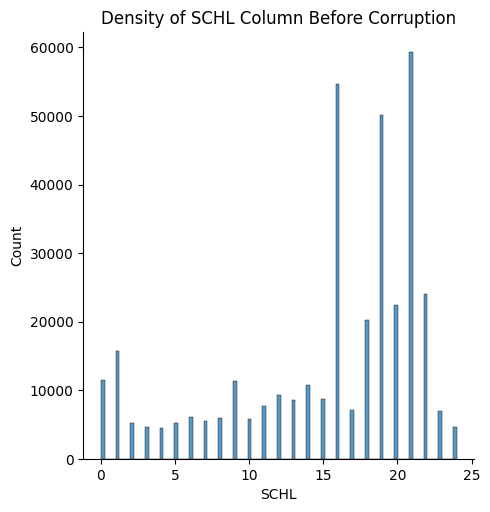

<Figure size 1500x500 with 0 Axes>

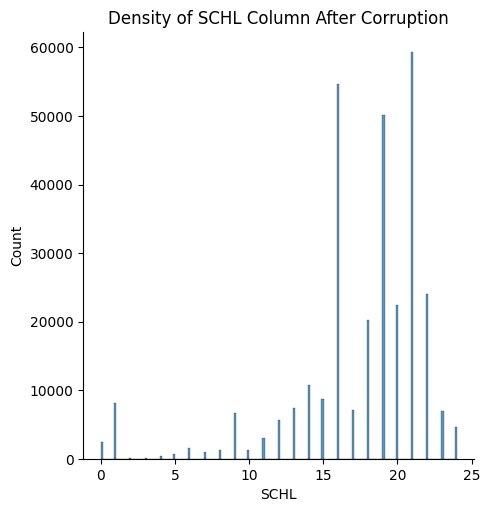

Plot AGEP column Split by Race [Before Corruption]


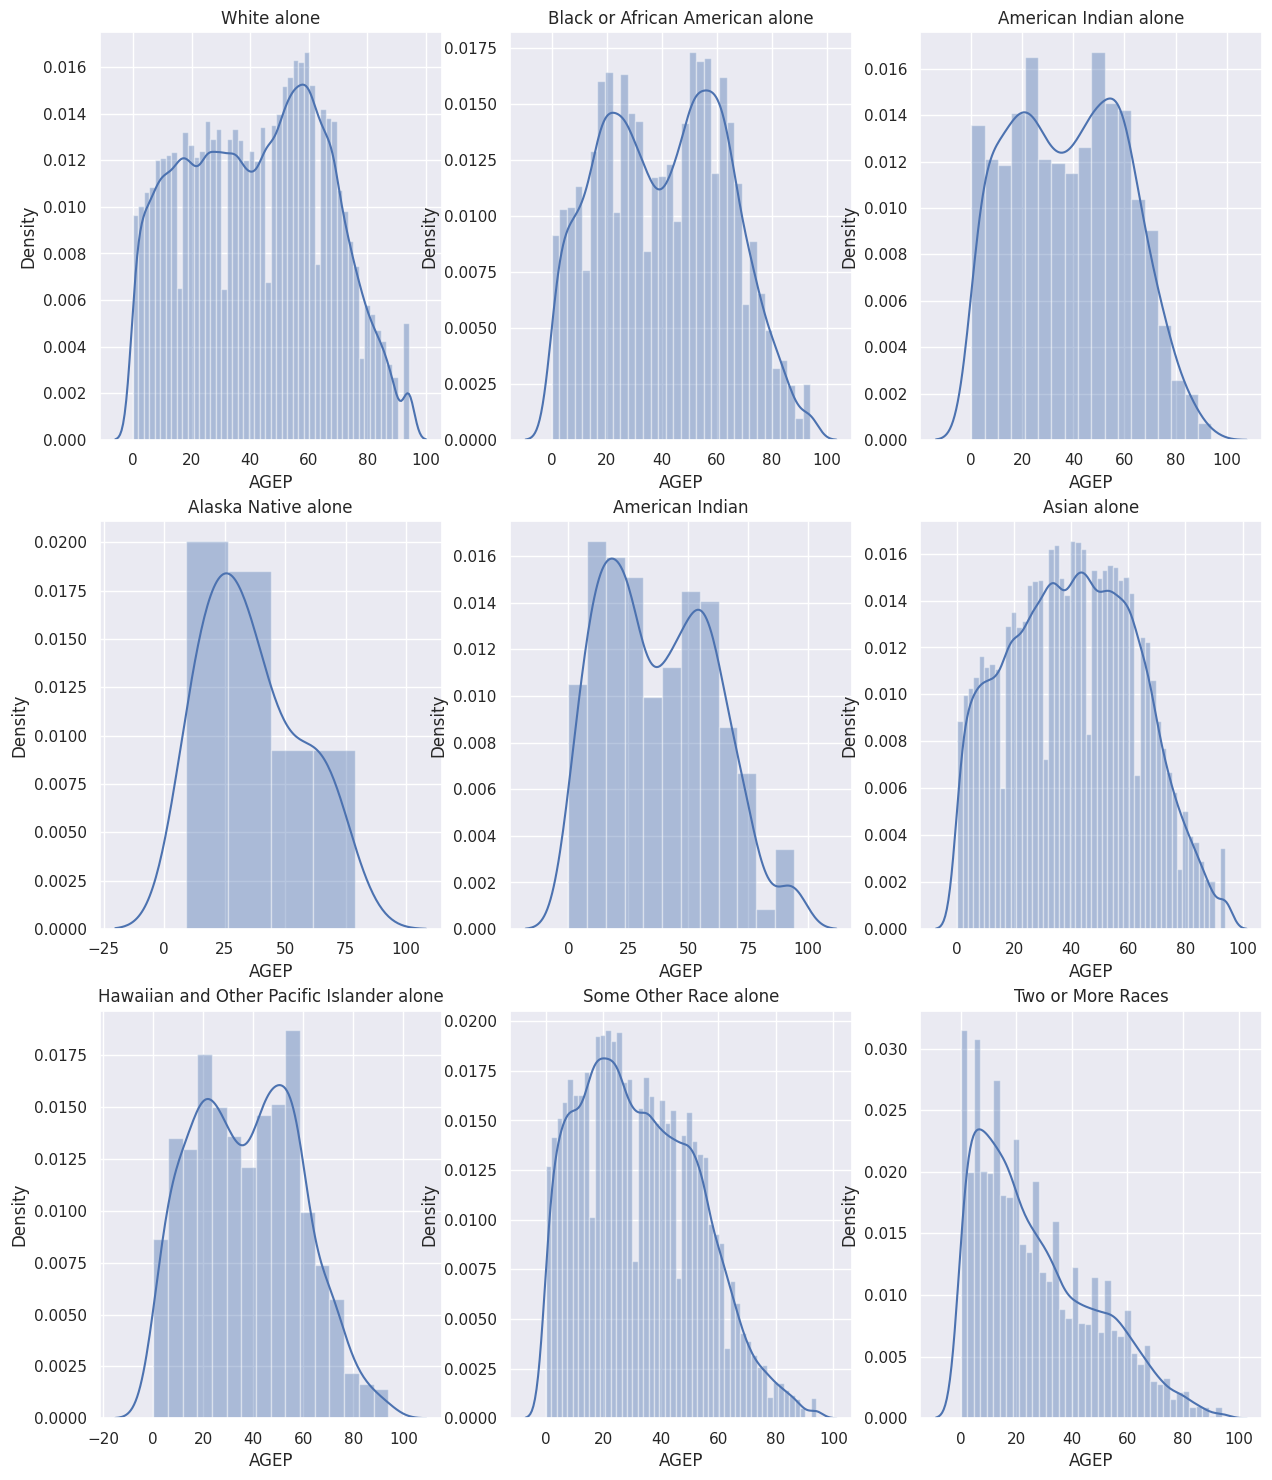




Plot AGEP column Split by Race [After Corruption]


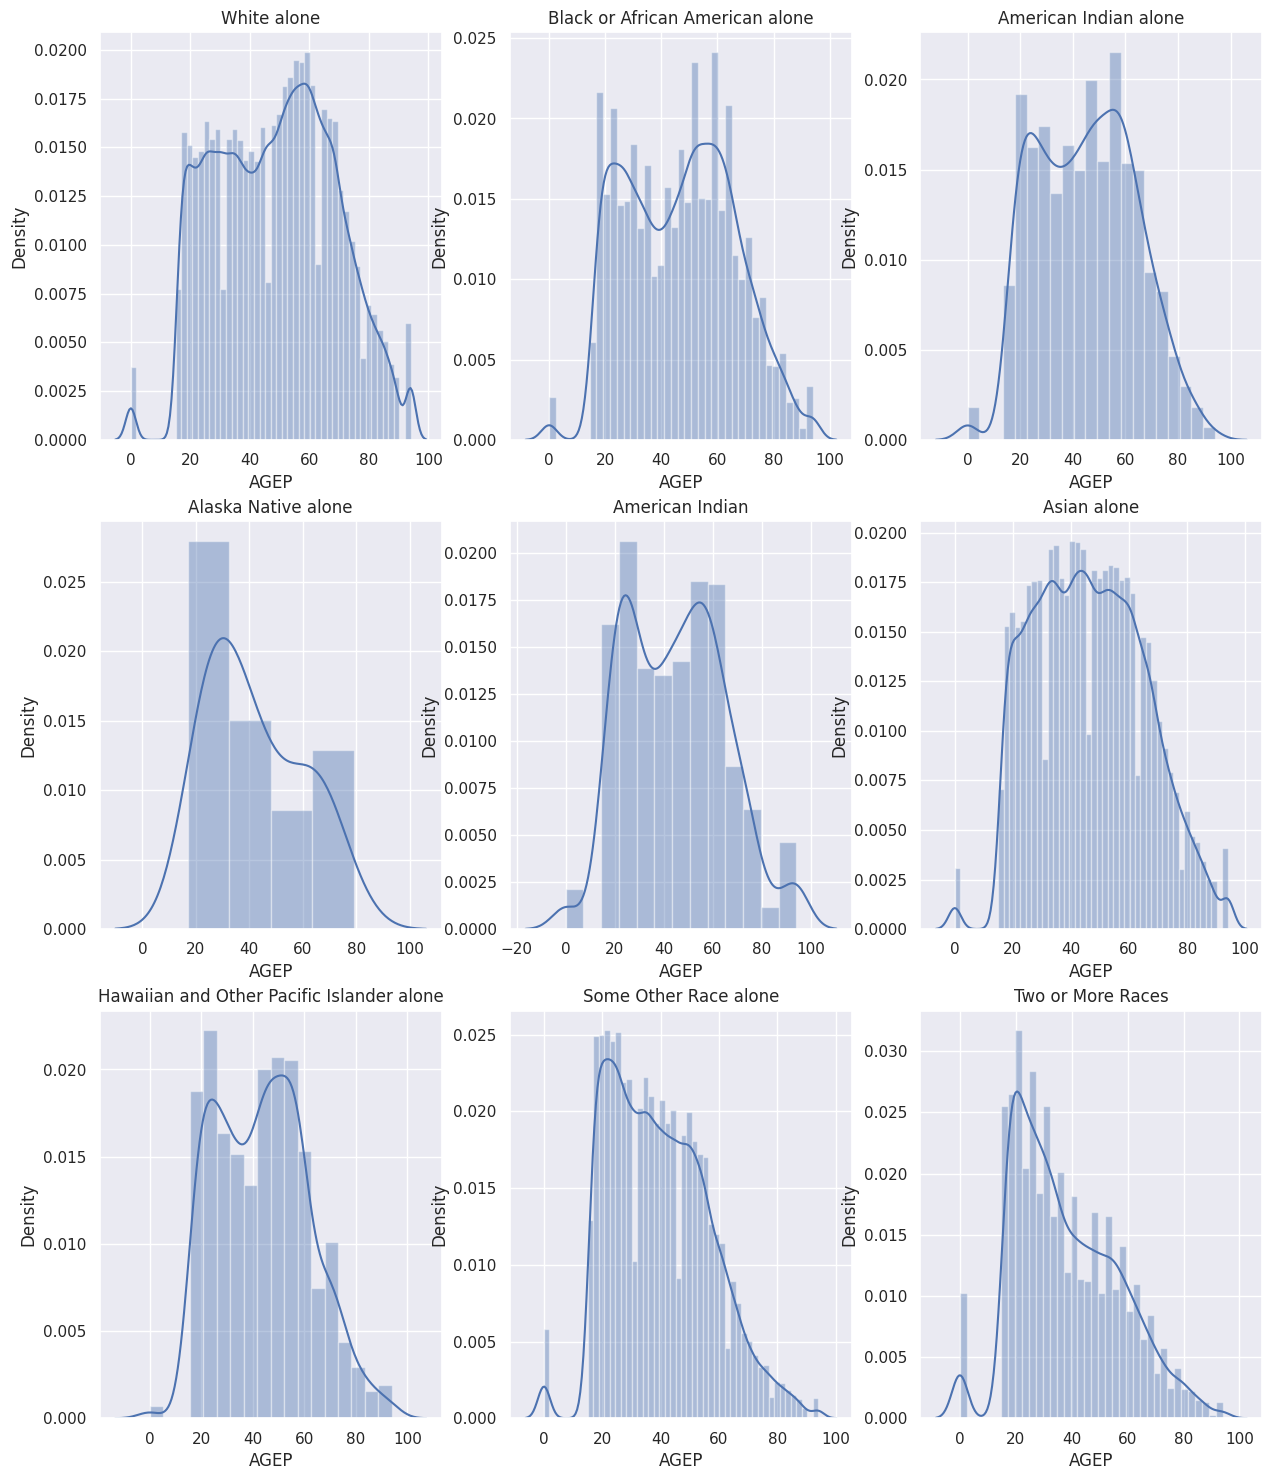

In [19]:
null_scenario_analysis(X_data, corrupted_data_MIL, target_col, condition_col, special_values)

#### ESP Column

**Scenario:** ESP is null, when you do not own child of householder, and not child in subfamily

In [20]:
special_values = [0]
condition_col='ESP'
target_col='ESP'
fraction=0.9
corrupted_data_ESP = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for ESP column: 270644
Count of all records in ESP column: 376035
Count of records in ESP column in the defined condition: 300716




<Figure size 1500x500 with 0 Axes>

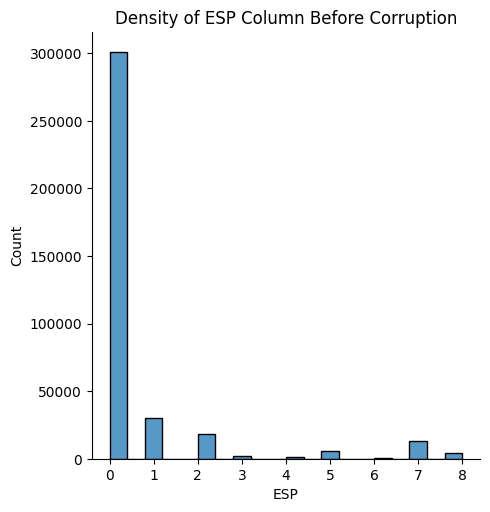

<Figure size 1500x500 with 0 Axes>

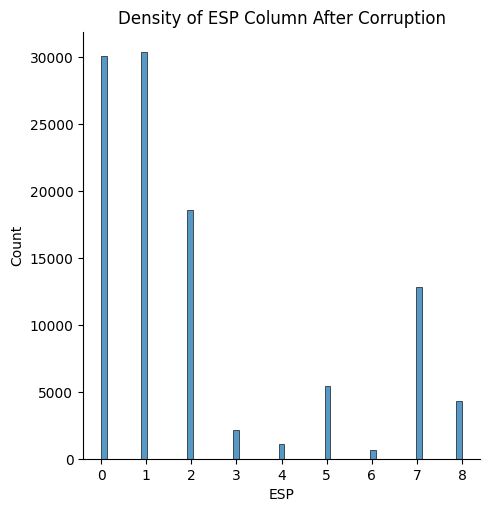

Plot AGEP column Split by Race [Before Corruption]


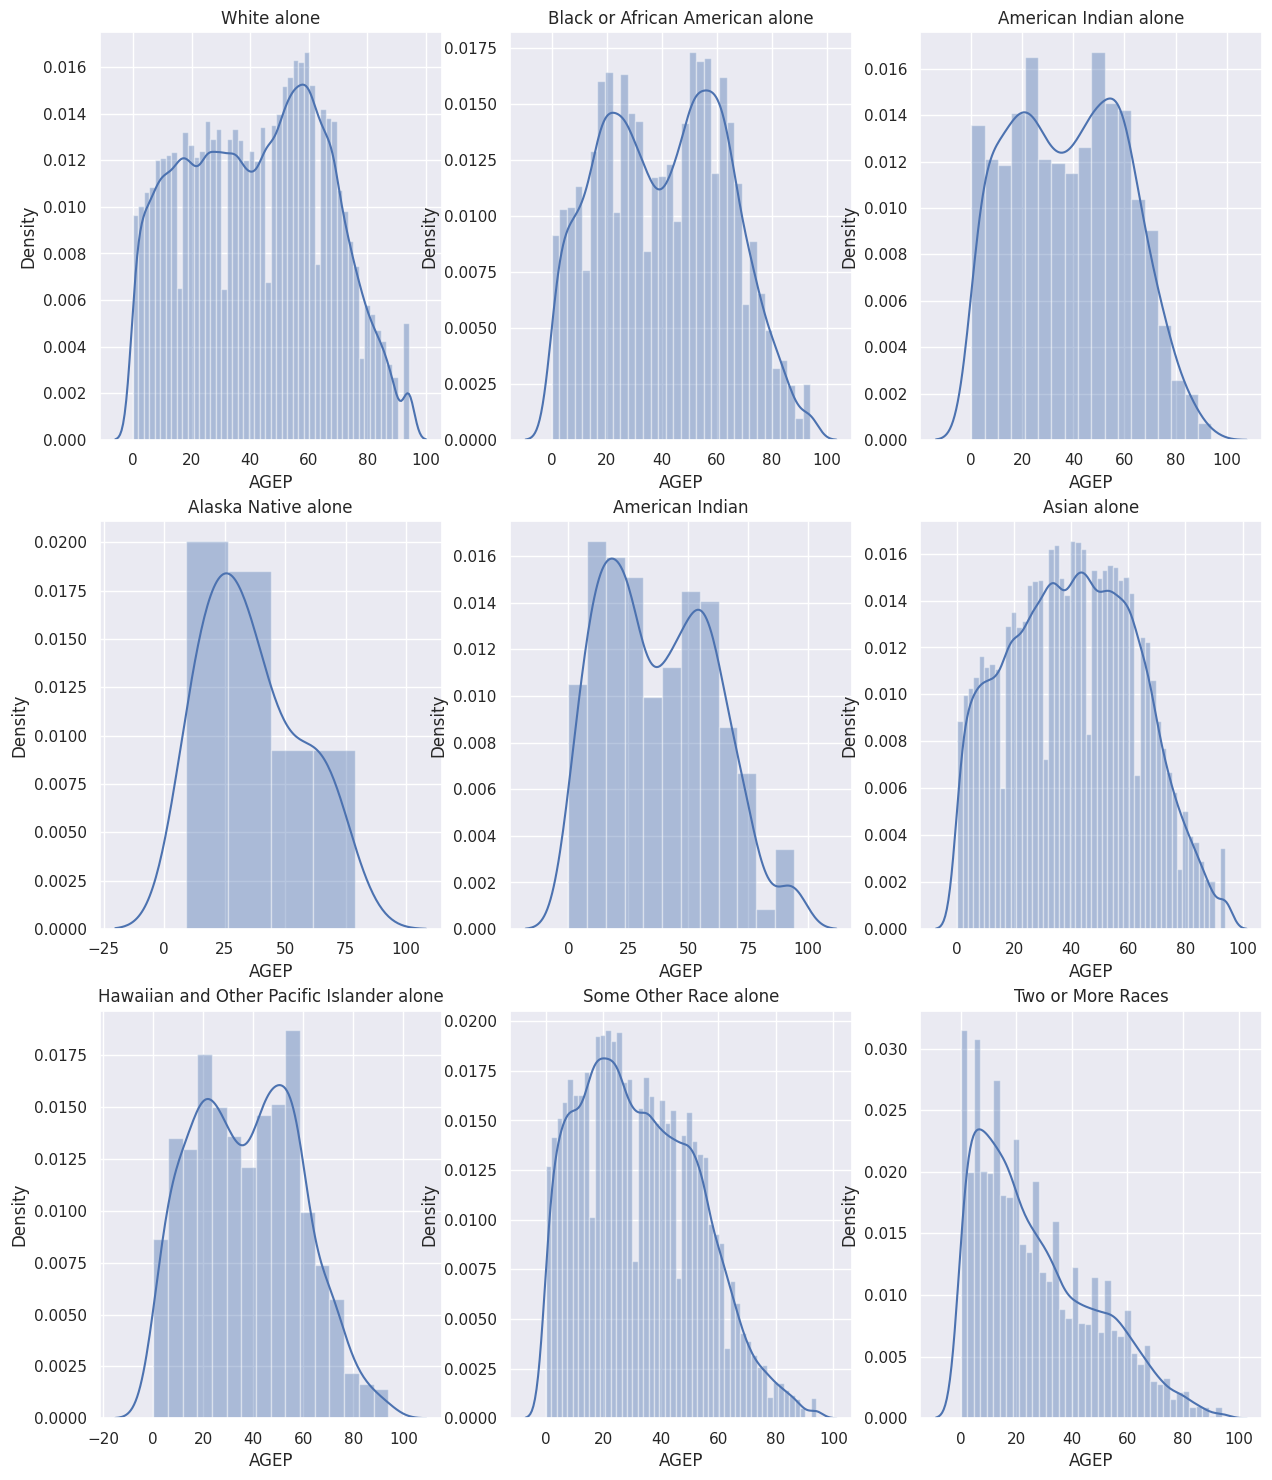




Plot AGEP column Split by Race [After Corruption]


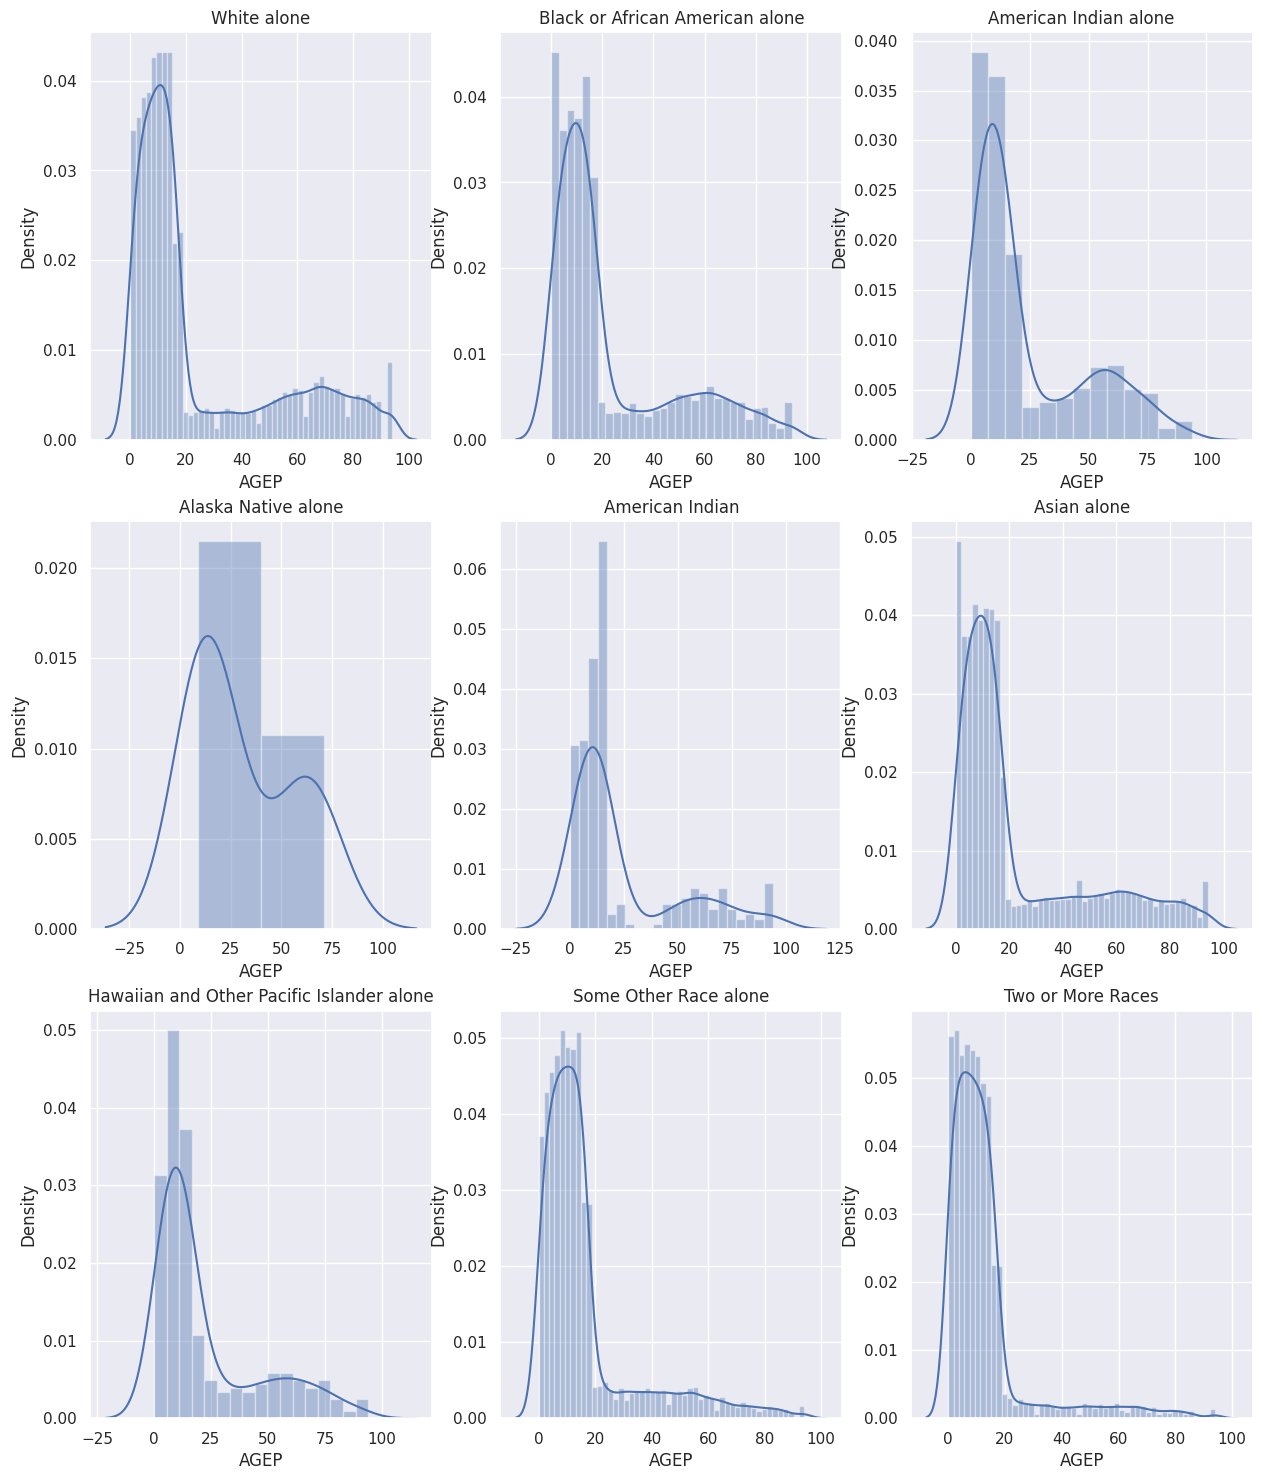

In [21]:
null_scenario_analysis(X_data, corrupted_data_ESP, target_col, condition_col, special_values)

#### MIG Column

**Scenario:** MIG, when AGEP is less than 1 year old

In [22]:
special_values = [0, 1]
condition_col='AGEP'
target_col='MIG'
fraction=0.9
corrupted_data_MIG = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for MIG column: 6776
Count of all records in MIG column: 376035
Count of records in AGEP column in the defined condition: 7529




<Figure size 1500x500 with 0 Axes>

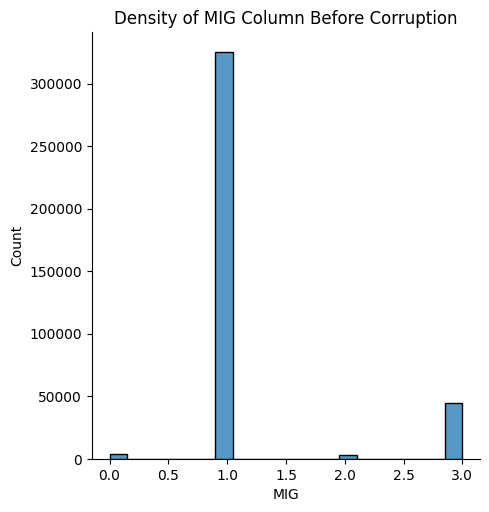

<Figure size 1500x500 with 0 Axes>

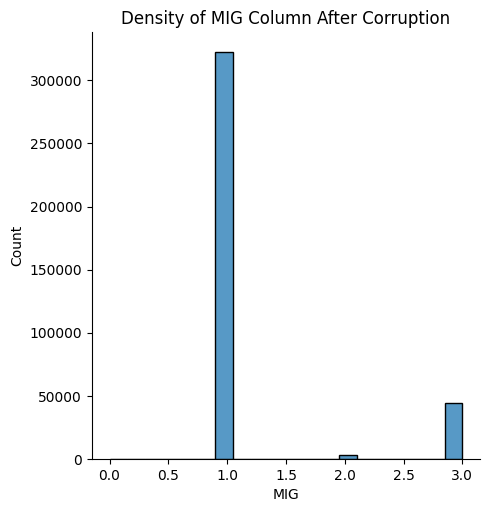

Plot AGEP column Split by Race [Before Corruption]


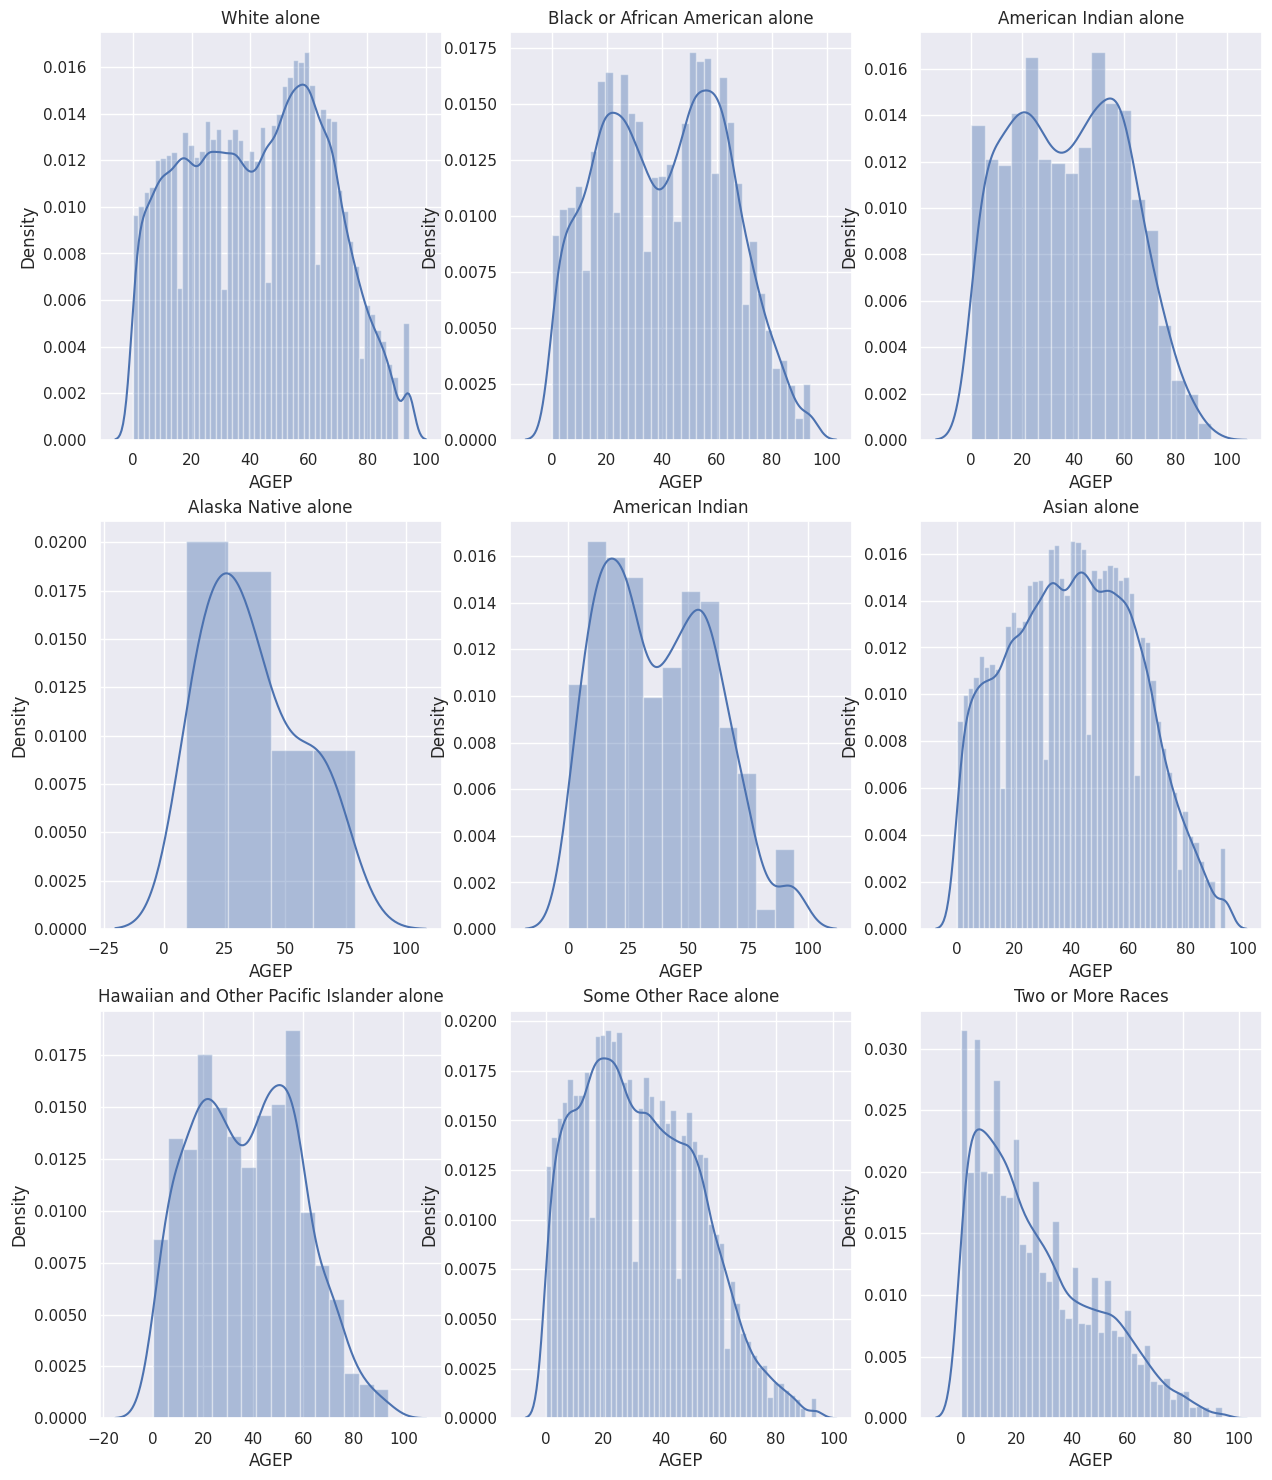




Plot AGEP column Split by Race [After Corruption]


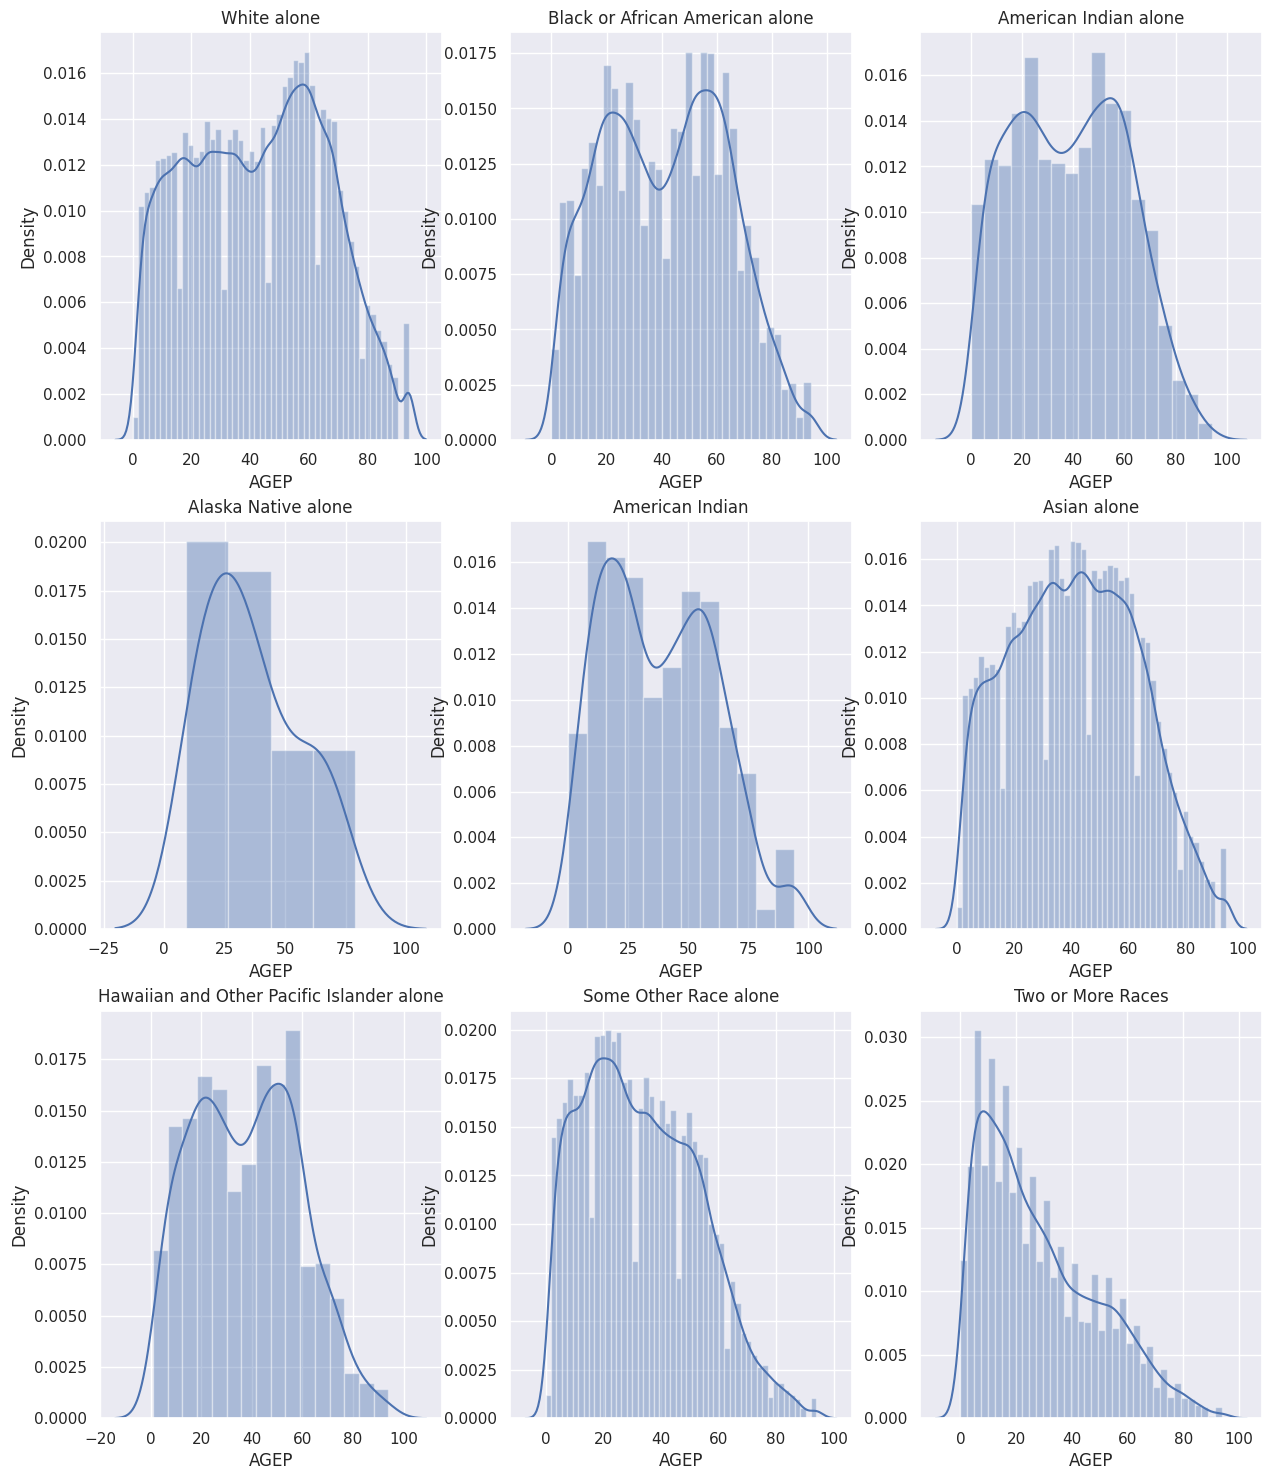

In [23]:
null_scenario_analysis(X_data, corrupted_data_MIG, target_col, condition_col, special_values)

#### DREM Column

**Scenario:** DREM is null, when AGEP is less than 5 years old

In [24]:
special_values = [i for i in range(0, 5)]
condition_col='AGEP'
target_col='DREM'
fraction=0.9
corrupted_data_DREM = nulls_simulator(X_data, target_col, condition_col, special_values, fraction)

Count of nulls for DREM column: 17644
Count of all records in DREM column: 376035
Count of records in AGEP column in the defined condition: 19605




<Figure size 1500x500 with 0 Axes>

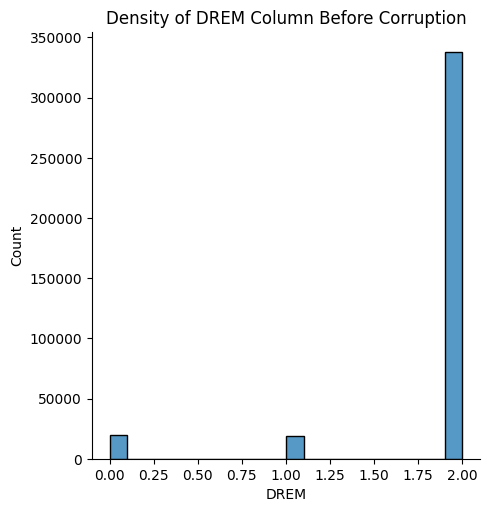

<Figure size 1500x500 with 0 Axes>

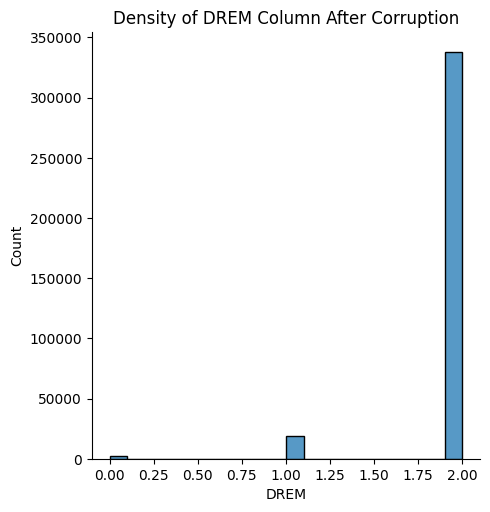

Plot AGEP column Split by Race [Before Corruption]


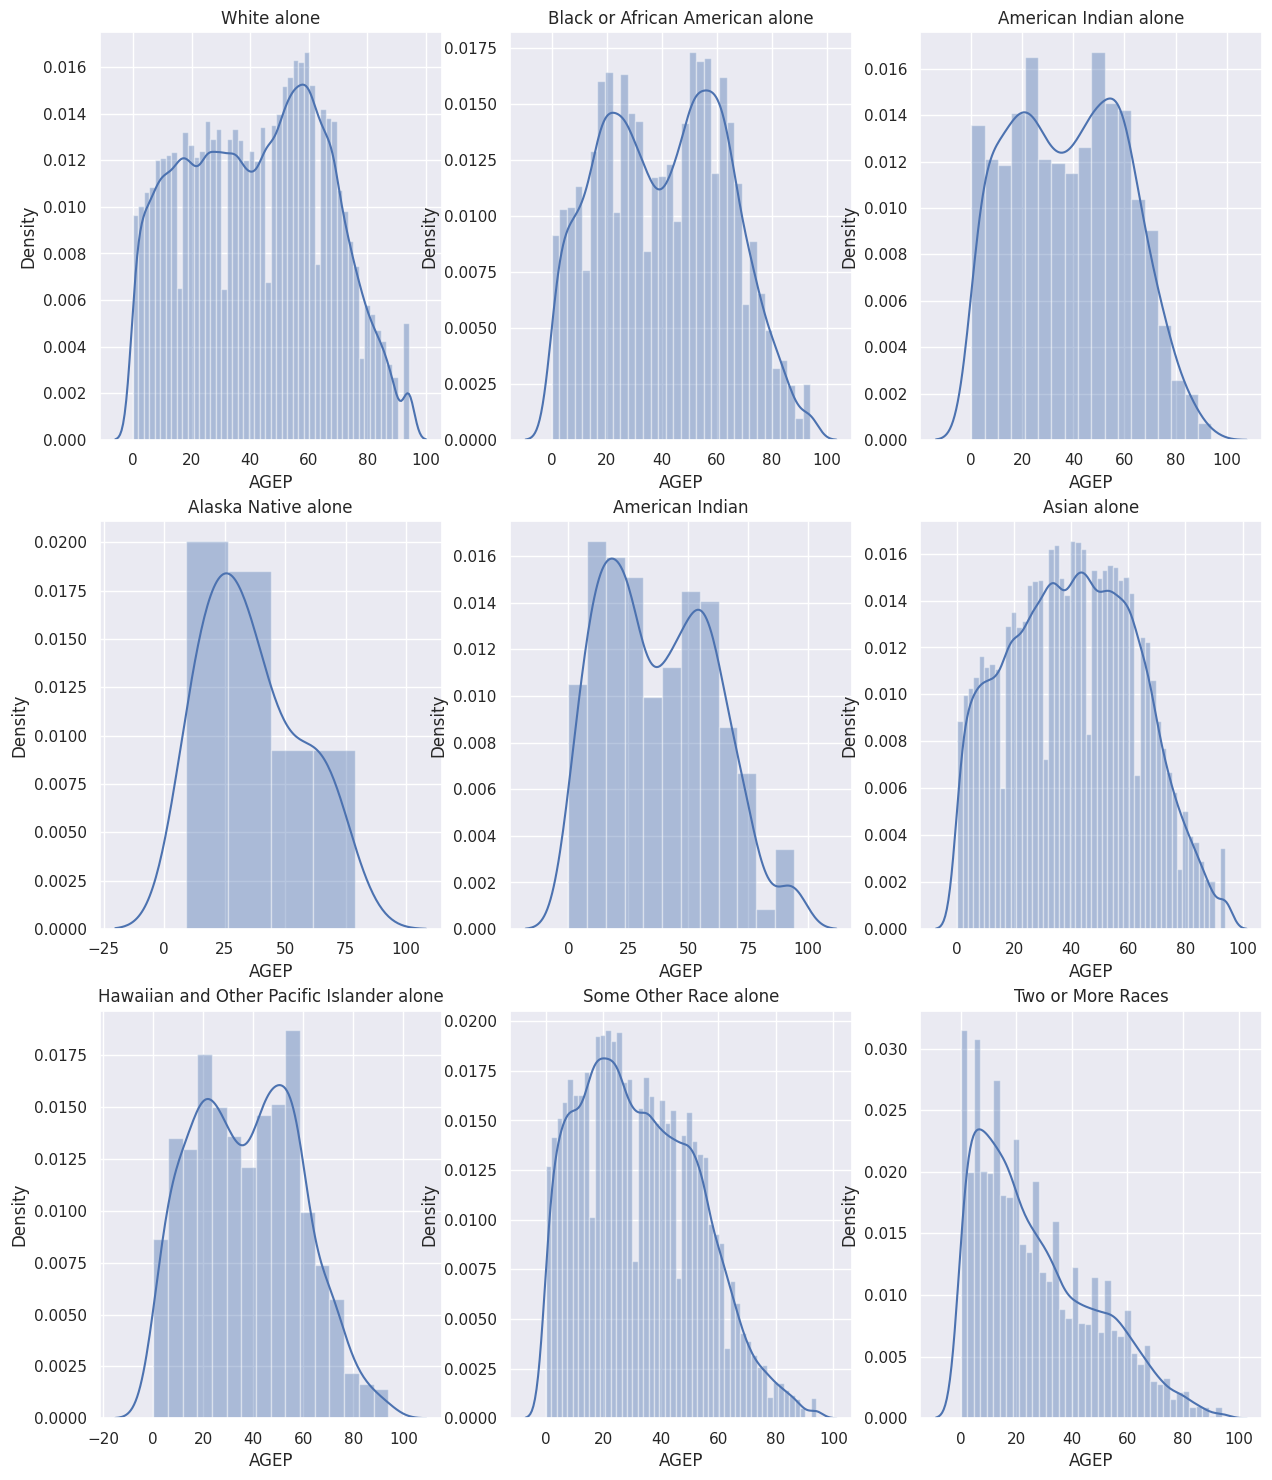




Plot AGEP column Split by Race [After Corruption]


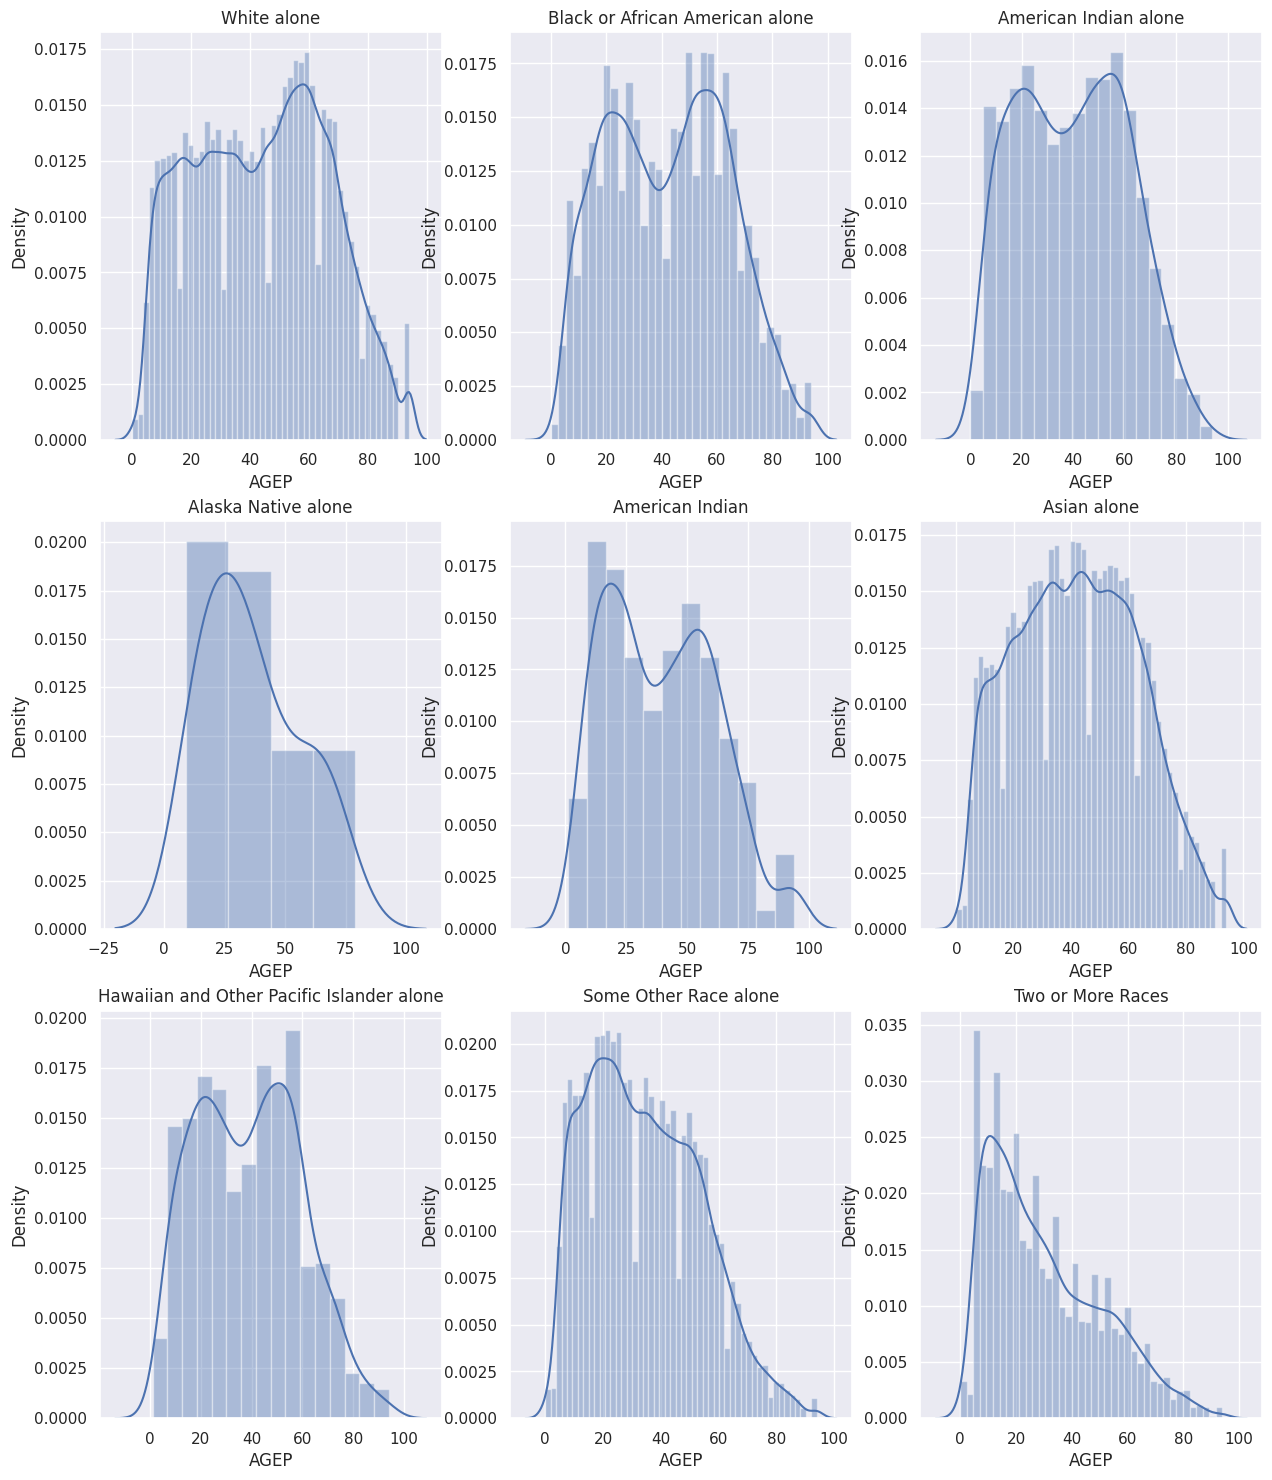

In [25]:
null_scenario_analysis(X_data, corrupted_data_DREM, target_col, condition_col, special_values)